**LSTM**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv('merged.csv')

In [ ]:
print(df.columns)

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'result', 'Class/ASD'],
      dtype='object')


In [ ]:
# df.drop('Class/ASD', axis=1, inplace=True)

In [ ]:
# Drop the result column as it contains the label we're trying to predict
#df.drop('Class/ASD Traits ', axis=1, inplace=True)

In [ ]:
df = pd.get_dummies(df, columns=['age','gender', 'ethnicity','jundice','austim', 'result','Class/ASD'])

In [ ]:
# Split the dataset into training and testing sets // 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)  # should be (n_samples, n_features)
print(X_test.shape)   # should be (n_samples, n_features)


(1723, 109)
(431, 109)


In [ ]:
# Scale the training and testing sets
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Reshape the training and testing sets for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# Train the LSTM model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
54/54 [==============================] - 7s 74ms/step - loss: 0.6121 - accuracy: 0.6489 - val_loss: 0.5708 - val_accuracy: 0.6334
Epoch 2/100
54/54 [==============================] - 4s 66ms/step - loss: 0.5320 - accuracy: 0.8270 - val_loss: 0.5084 - val_accuracy: 0.9234
Epoch 3/100
54/54 [==============================] - 6s 106ms/step - loss: 0.4350 - accuracy: 0.8549 - val_loss: 0.3858 - val_accuracy: 0.8770
Epoch 4/100
54/54 [==============================] - 6s 119ms/step - loss: 0.2943 - accuracy: 0.9211 - val_loss: 0.2082 - val_accuracy: 0.9281
Epoch 5/100
54/54 [==============================] - 8s 157ms/step - loss: 0.1210 - accuracy: 0.9721 - val_loss: 0.0663 - val_accuracy: 0.9954
Epoch 6/100
54/54 [==============================] - 7s 135ms/step - loss: 0.0437 - accuracy: 0.9983 - val_loss: 0.0260 - val_accuracy: 1.0000
Epoch 7/100
54/54 [==============================] - 9s 159ms/step - loss: 0.0229 - accuracy: 0.9994 - val_loss: 0.0192 - val_accuracy: 0.9954
E

In [ ]:
print(y_train)

867     0
1606    1
1111    1
1258    1
1319    1
       ..
1638    1
1095    0
1130    0
1294    0
860     0
Name: Class/ASD_Yes, Length: 1723, dtype: uint8


In [ ]:
feature_extractor_model = Sequential()
for layer in model.layers[:-1]:
    feature_extractor_model.add(layer)

In [ ]:
# Load the new data from a CSV file
new_data = pd.read_csv('merged.csv')  # Replace 'your_new_data.csv' with the actual filename

In [ ]:
# Drop the result column as it contains the label we're trying to predict
#new_data.drop('Class/ASD', axis=1, inplace=True)

In [ ]:
# df = pd.get_dummies(df, columns=['age','gender', 'ethnicity','jundice','austim', 'result','Class/ASD'])

In [ ]:
# Convert the categorical variables into dummy variables
new_data = pd.get_dummies(new_data, columns=['age','gender', 'ethnicity','jundice','austim', 'result','Class/ASD'])

In [ ]:
# Preprocess the new data
X_new = new_data.iloc[:, :-1].values
X_new_normalized = sc.transform(X_new) # Scaling


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
print(X_new_normalized.shape)

(2154, 109)


In [ ]:
# # This Step is important
# sequence_length = 34   # read more about these two varibles
# input_dim = 1
# #X_new_reshaped = X_new_normalized.reshape(X_new_normalized, (X_new_normalized.shape[0], X_new_normalized.shape[1], 1))
# X_new_reshaped = X_new_normalized.reshape((-1, sequence_length, input_dim))

In [ ]:
features = feature_extractor_model.predict(X_new_normalized)

68/68 [==============================] - 2s 18ms/step


In [ ]:
# Evaluate the LSTM model
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

14/14 [==============================] - 0s 19ms/step - loss: 2.3555e-05 - accuracy: 1.0000
Test loss: 2.3555043298983946e-05
Test accuracy: 1.0


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(features.shape)
print(type(features))
print(features.ndim)

(2154, 64)
<class 'numpy.ndarray'>
2


To convert a 2D array features into a vector, you can use the flatten() method or the ravel() function in NumPy. Both methods perform the same task of flattening the array into a 1D vector.

In [ ]:
import numpy as np

# Assuming features is a 2D array with shape (1, 64)
features = features.flatten()  # or vector = features.ravel()


In [ ]:
# splitting features in test and train
from sklearn.model_selection import train_test_split
train_feature_1, test_feature_1 = train_test_split(features, test_size=0.2, random_state=42)


End of LSTM

Start of Dense Net

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
input_folder = '/content/drive/My Drive/ProjectThesis/ASD'

**Directory**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('/content/drive/My Drive/ProjectThesis/ASD/train')

label_types = os.listdir('/content/drive/My Drive/ProjectThesis/ASD/train')
print (label_types)

['Spinning', 'HeadBanging', 'ArmFlapping']


**Preparing Training Data**

In [ ]:
rooms = []

for item in dataset_path:
 # Get all the file names
 all_rooms = os.listdir('/content/drive/My Drive/ProjectThesis/ASD/train' + '/' +item)

 # Add them to the list
 for room in all_rooms:
    rooms.append((item, str('/content/drive/My Drive/ProjectThesis/ASD/train' + '/' +item) + '/' + room))

# Build a dataframe
train_df = pd.DataFrame(data=rooms, columns=['tag', 'video_name'])
print(train_df.head())
print(train_df.tail())

        tag                                         video_name
0  Spinning  /content/drive/My Drive/ProjectThesis/ASD/trai...
1  Spinning  /content/drive/My Drive/ProjectThesis/ASD/trai...
2  Spinning  /content/drive/My Drive/ProjectThesis/ASD/trai...
3  Spinning  /content/drive/My Drive/ProjectThesis/ASD/trai...
4  Spinning  /content/drive/My Drive/ProjectThesis/ASD/trai...
            tag                                         video_name
51  ArmFlapping  /content/drive/My Drive/ProjectThesis/ASD/trai...
52  ArmFlapping  /content/drive/My Drive/ProjectThesis/ASD/trai...
53  ArmFlapping  /content/drive/My Drive/ProjectThesis/ASD/trai...
54  ArmFlapping  /content/drive/My Drive/ProjectThesis/ASD/trai...
55  ArmFlapping  /content/drive/My Drive/ProjectThesis/ASD/trai...


In [ ]:
df = train_df.loc[:,['video_name','tag']]
df
df.to_csv('train.csv')

**Preparing Test Data**

In [ ]:
dataset_path = os.listdir('/content/drive/My Drive/ProjectThesis/ASD/test')
print(dataset_path)

room_types = os.listdir('/content/drive/My Drive/ProjectThesis/ASD/test')
print("Types of activities found: ", len(dataset_path))

rooms = []

for item in dataset_path:
 # Get all the file names
 all_rooms = os.listdir('/content/drive/My Drive/ProjectThesis/ASD/test' + '/' +item)

 # Add them to the list
 for room in all_rooms:
    rooms.append((item, str('/content/drive/My Drive/ProjectThesis/ASD/test' + '/' +item) + '/' + room))

# Build a dataframe
test_df = pd.DataFrame(data=rooms, columns=['tag', 'video_name'])
print(test_df.head())
print(test_df.tail())

df = test_df.loc[:,['video_name','tag']]
df
df.to_csv('test.csv')

['HeadBanging', 'Spinning', 'ArmFlapping']
Types of activities found:  3
           tag                                         video_name
0  HeadBanging  /content/drive/My Drive/ProjectThesis/ASD/test...
1  HeadBanging  /content/drive/My Drive/ProjectThesis/ASD/test...
2  HeadBanging  /content/drive/My Drive/ProjectThesis/ASD/test...
3  HeadBanging  /content/drive/My Drive/ProjectThesis/ASD/test...
4  HeadBanging  /content/drive/My Drive/ProjectThesis/ASD/test...
            tag                                         video_name
13  ArmFlapping  /content/drive/My Drive/ProjectThesis/ASD/test...
14  ArmFlapping  /content/drive/My Drive/ProjectThesis/ASD/test...
15  ArmFlapping  /content/drive/My Drive/ProjectThesis/ASD/test...
16  ArmFlapping  /content/drive/My Drive/ProjectThesis/ASD/test...
17  ArmFlapping  /content/drive/My Drive/ProjectThesis/ASD/test...


In [ ]:
!pip install git+https://github.com/tensorflow/docs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-751o62le
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-751o62le
  Resolved https://github.com/tensorflow/docs to commit 5d7c4c291249a7c7e149316ef0ac5eb86fd2cda1
  Preparing metadata (setup.py) ... done


In [ ]:
from tensorflow_docs.vis import embed
from tensorflow import keras
from imutils import paths

import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import imageio
import cv2
import os

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],[tf.config.experimental.VirtualDeviceConfiguration(memory_limit=5120)])
  except RuntimeError as e:
    print(e)

**Data preparation**

In [ ]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

print(f"Total videos for training: {len(train_df)}")
print(f"Total videos for testing: {len(test_df)}")


train_df.sample(10)

Total videos for training: 56
Total videos for testing: 18


,Unnamed: 0,video_name,tag
27,27,/content/drive/My Drive/ProjectThesis/ASD/trai...,HeadBanging
12,12,/content/drive/My Drive/ProjectThesis/ASD/trai...,Spinning
33,33,/content/drive/My Drive/ProjectThesis/ASD/trai...,HeadBanging
29,29,/content/drive/My Drive/ProjectThesis/ASD/trai...,HeadBanging
44,44,/content/drive/My Drive/ProjectThesis/ASD/trai...,ArmFlapping
20,20,/content/drive/My Drive/ProjectThesis/ASD/trai...,HeadBanging
34,34,/content/drive/My Drive/ProjectThesis/ASD/trai...,HeadBanging
0,0,/content/drive/My Drive/ProjectThesis/ASD/trai...,Spinning
38,38,/content/drive/My Drive/ProjectThesis/ASD/trai...,ArmFlapping
37,37,/content/drive/My Drive/ProjectThesis/ASD/trai...,HeadBanging


**Feed the videos to a network:**

In [ ]:
# The following two methods are taken from this tutorial:
# https://www.tensorflow.org/hub/tutorials/action_recognition_with_tf_hub
IMG_SIZE = 224


def crop_center_square(frame):
    y, x = frame.shape[0:2]
    min_dim = min(y, x)
    start_x = (x // 2) - (min_dim // 2)
    start_y = (y // 2) - (min_dim // 2)
    return frame[start_y : start_y + min_dim, start_x : start_x + min_dim]


def load_video(path, max_frames=0, resize=(IMG_SIZE, IMG_SIZE)):
    cap = cv2.VideoCapture(path)
    frames = []
    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            frame = crop_center_square(frame)
            frame = cv2.resize(frame, resize)
            frame = frame[:, :, [2, 1, 0]]
            frames.append(frame)

            if len(frames) == max_frames:
                break
    finally:
        cap.release()
    return np.array(frames)

**Feature Extraction**

In [ ]:
def build_feature_extractor():
    feature_extractor = keras.applications.DenseNet121(
        weights="imagenet",
        include_top=False,
        pooling="avg",
        input_shape=(IMG_SIZE, IMG_SIZE, 3),
    )
    preprocess_input = keras.applications.inception_v3.preprocess_input  ############ Inception is used here, why.

    inputs = keras.Input((IMG_SIZE, IMG_SIZE, 3))
    preprocessed = preprocess_input(inputs)

    outputs = feature_extractor(preprocessed)

    return keras.Model(inputs, outputs, name="feature_extractor")


feature_extractor = build_feature_extractor()

In [ ]:
feature_extractor.summary()

Model: "feature_extractor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv_1 (TFOpLamb  (None, 224, 224, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_1 (TFOpLam  (None, 224, 224, 3)      0         
 bda)                                                            
                                                                 
 densenet121 (Functional)    (None, 1024)              7037504   
                                                                 
Total params: 7,037,504
Trainable params: 6,953,856
Non-trainable params: 83,648
_________________________________________________________________


In [ ]:
 #print(outputs) #######################

**Label Encoding**
StringLookup layer encode the class labels as integers.

In [ ]:
label_processor = keras.layers.StringLookup(num_oov_indices=0, vocabulary=np.unique(train_df["tag"]))
print(label_processor.get_vocabulary())

labels = train_df["tag"].values
labels = label_processor(labels[..., None]).numpy()
labels

['ArmFlapping', 'HeadBanging', 'Spinning']


array([[2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

Finally, we can put all the pieces together to create our data processing utility.

In [ ]:
#Define hyperparameters

IMG_SIZE = 224
BATCH_SIZE = 64
EPOCHS = 20   ########################################

MAX_SEQ_LENGTH = 20
NUM_FEATURES = 1024 # I changed it from 2048 to 1024 for DenseNet121 in feature extraction.

In [ ]:
def prepare_all_videos(df, root_dir):
    num_samples = len(df)
    video_paths = df["video_name"].values.tolist()
    labels = df["tag"].values
    labels = label_processor(labels[..., None]).numpy()

    frame_masks = np.zeros(shape=(num_samples, MAX_SEQ_LENGTH), dtype="bool")
    frame_features = np.zeros(shape=(num_samples, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32")

    for idx, path in enumerate(video_paths):
        frames = load_video(os.path.join(root_dir, path))
        frames = frames[None, ...]

        temp_frame_mask = np.zeros(shape=(1, MAX_SEQ_LENGTH,), dtype="bool")
        temp_frame_features = np.zeros(shape=(1, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32")

        for i, batch in enumerate(frames):
            video_length = batch.shape[0]
            length = min(MAX_SEQ_LENGTH, video_length)
            for j in range(length):
                temp_frame_features[i, j, :] = feature_extractor.predict(batch[None, j, :])
            temp_frame_mask[i, :length] = 1

        frame_features[idx,] = temp_frame_features.squeeze()
        frame_masks[idx,] = temp_frame_mask.squeeze()

    # Reshape frame_features to have shape (num_samples * MAX_SEQ_LENGTH, NUM_FEATURES)
    frame_features = frame_features.reshape(-1, NUM_FEATURES)
   # frame_masks = frame_masks.reshape(-1, NUM_FEATURES)

    return (frame_features, frame_masks), labels

train_data, train_labels = prepare_all_videos(train_df, "train")
test_data, test_labels = prepare_all_videos(test_df, "test")

# Print the updated shapes
print(f"Frame features in train set: {train_data[0].shape}")
print(f"Frame masks in train set: {train_data[1].shape}")

# Print the updated train_labels shape
print(f"train_labels in train set: {train_labels.shape}")

1/1 [==============================] - 0s 209ms/step
Frame features in train set: (1120, 1024)
Frame masks in train set: (56, 20)
train_labels in train set: (56, 1)


Concatenating Features from both Models

In [ ]:
print(features.shape)
print(type(features))

(137856,)
<class 'numpy.ndarray'>


In [ ]:
print(features.ndim)
print(features.size)

1
137856


In [ ]:
#features.reshape(-1)

In [ ]:
print(type(features))

<class 'numpy.ndarray'>


In [ ]:
#

In [ ]:
print(train_data[0].shape)
print(type(train_data[0]))

(1120, 1024)
<class 'numpy.ndarray'>


In [ ]:
print(train_data[0].ndim)

2


In [ ]:
#combined_features = np.concatenate((train_data[0], features), axis=0)

In [ ]:
print(train_data)

(array([[6.5612822e-04, 7.0463670e-03, 5.1325890e-03, ..., 5.6421596e-01,
        2.3051531e+00, 1.0664469e+00],
       [5.9922034e-04, 6.4139650e-03, 5.0646146e-03, ..., 2.8501049e-01,
        2.0706987e+00, 1.1860971e+00],
       [5.6489883e-04, 7.4730595e-03, 4.9987459e-03, ..., 5.0320655e-01,
        2.6445391e+00, 1.0356964e+00],
       ...,
       [2.2496705e-04, 5.0316467e-03, 6.3339379e-03, ..., 1.4133106e+00,
        7.7147800e-01, 6.6314268e-01],
       [2.5178571e-04, 5.1307813e-03, 6.6226819e-03, ..., 8.0560154e-01,
        8.0044830e-01, 3.7302566e-01],
       [2.5732841e-04, 4.5772120e-03, 6.8886881e-03, ..., 7.5483990e-01,
        1.0112807e+00, 3.5680845e-01]], dtype=float32), array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
      

In [ ]:
  # create an array of size 67456
  #arr = np.random.rand(features.size)

  # find a shape with 20 rows that has the same number of elements as the original array
  #cols = arr.size // 20
  #new_shape = (19, 1024)

  # reshape the array to the new shape
  #features = arr.reshape(new_shape)


In [ ]:
print(train_feature_1.shape)
print(test_feature_1.shape)

(110284,)
(27572,)


In [ ]:
import math
temp = train_feature_1.size/MAX_SEQ_LENGTH
print(train_feature_1.size)
print(temp)
temp = temp/NUM_FEATURES
print(temp)
temp = math.ceil(temp)
print(temp)
print(temp*MAX_SEQ_LENGTH*NUM_FEATURES)

110284
5514.2
5.3849609375
6
122880


In [ ]:
import math
temp2 = test_feature_1.size/MAX_SEQ_LENGTH
temp2 = temp2/NUM_FEATURES
temp2 = math.ceil(temp2)
print(temp2)

2


In [ ]:
temp3 = MAX_SEQ_LENGTH*NUM_FEATURES*temp
print(temp3)
print(train_feature_1.size)

122880
110284


In [ ]:
train_feature_1 = np.pad(train_feature_1, (0, temp3-train_feature_1.size), mode='constant', constant_values=0)

In [ ]:
temp4 = MAX_SEQ_LENGTH*NUM_FEATURES*temp2

In [ ]:
test_feature_1 = np.pad(test_feature_1, (0, temp4-test_feature_1.size), mode='constant', constant_values=0)

In [ ]:
train_feature_1 = train_feature_1.reshape(-1,MAX_SEQ_LENGTH, NUM_FEATURES)

In [ ]:
test_feature_1 = test_feature_1.reshape(-1,MAX_SEQ_LENGTH, NUM_FEATURES)

In [ ]:
#features = features.reshape(-1,MAX_SEQ_LENGTH, NUM_FEATURES)

In [ ]:
# Reshaping Train data
train_features = train_data[0].reshape(-1, MAX_SEQ_LENGTH, NUM_FEATURES)
print(train_features.shape)
print(type(train_features))
print(train_features.ndim)
print(train_features.size)

(56, 20, 1024)
<class 'numpy.ndarray'>
3
1146880


In [ ]:
# Reshaping Test data
test_features = test_data[0].reshape(-1, MAX_SEQ_LENGTH, NUM_FEATURES)
print(test_features.shape)
print(type(test_features))
print(test_features.ndim)
print(test_features.size)

(18, 20, 1024)
<class 'numpy.ndarray'>
3
368640


In [ ]:


# concatenate the two arrays along the first axis
#result = np.concatenate((array2d_reshaped, array3d), axis=0)

In [ ]:
#train_features = np.array(train_data)
#print(train_features.shape)

In [ ]:
train_features = np.concatenate((train_features, train_feature_1), axis=0)
test_features = np.concatenate((test_features, test_feature_1), axis=0)

In [ ]:
print(type(y_train))
print(type(train_labels))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [ ]:
#y_train = y_train.reshape(train_labels.shape)
#train_labels = np.concatenate((train_labels,y_train), axis=0)

In [ ]:
# It is required.
# print(combined_train_features.shape)
# print(train_labels.shape)

Given

In [ ]:
from tensorflow import keras

# Define the RNN model
def build_rnn_model():
    model = keras.models.Sequential([
        keras.layers.Masking(mask_value=0.0, input_shape=(MAX_SEQ_LENGTH, NUM_FEATURES)),
        keras.layers.GRU(16),
        keras.layers.Dropout(0.4),
        keras.layers.Dense(8, activation='relu'),
        keras.layers.Dense(len(label_processor.get_vocabulary()), activation='softmax')
    ])
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Build and train the RNN model
rnn_model = build_rnn_model()
rnn_model.summary()  # Print the model summary

# Reshape the training and testing data to match the RNN input shape
train_features = train_data[0].reshape(-1, MAX_SEQ_LENGTH, NUM_FEATURES)
test_features = test_data[0].reshape(-1, MAX_SEQ_LENGTH, NUM_FEATURES)

# Train the model
history = rnn_model.fit(train_features, train_labels, validation_split=0.3, epochs=EPOCHS)

# Evaluate the model on the testing data
_, accuracy = rnn_model.evaluate(test_features, test_labels)
print(f"Test accuracy: {round(accuracy * 100, 2)}%")

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_1 (Masking)         (None, 20, 1024)          0         
                                                                 
 gru_1 (GRU)                 (None, 16)                50016     
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 3)                 27        
                                                                 
Total params: 50,179
Trainable params: 50,179
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
2/2 [==============================] - 

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

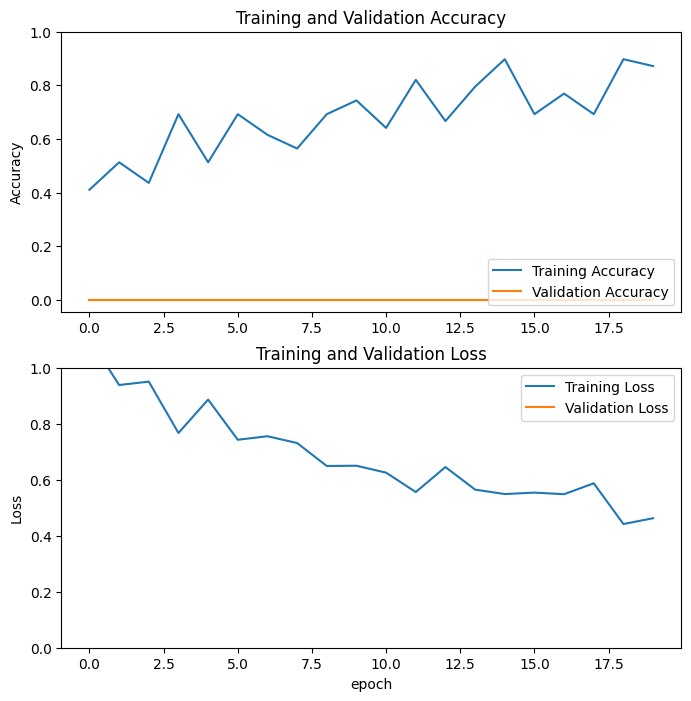

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.ylim([0, 1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()